Comparing Python Clustering Algorithms

https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [2]:
data = np.load('clusterable_data.npy')

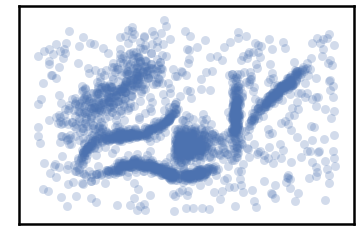

In [3]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [4]:
# Testing Clustering Algorithms

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [5]:
# K-Means

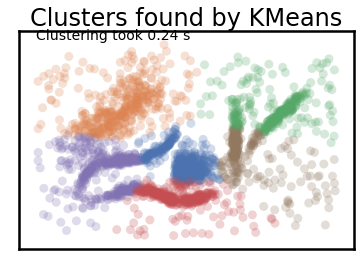

In [6]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


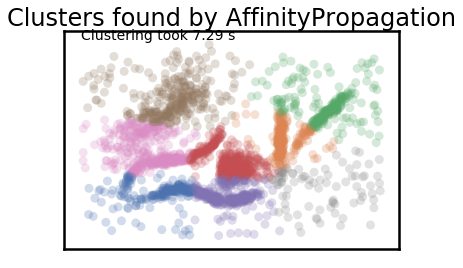

In [7]:
# Affinity Propagation

plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass bandwidth=0.175 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


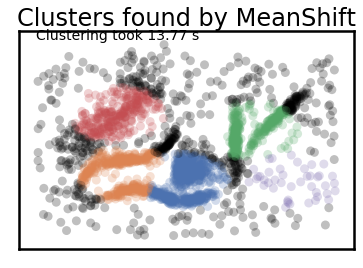

In [8]:
# Mean Shift

plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})

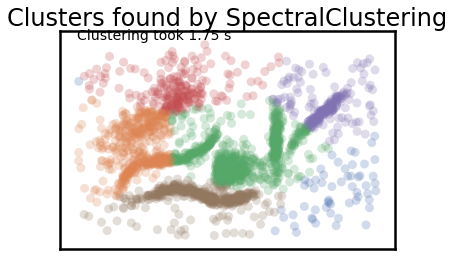

In [9]:
# Spectral Clustering

plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

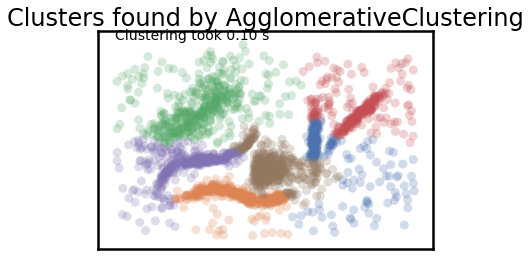

In [10]:
# Agglomerative Clustering

plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

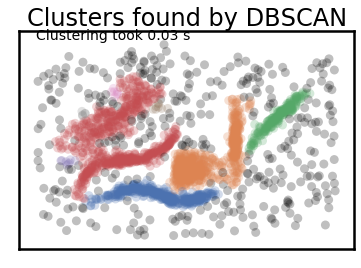

In [11]:
# DBSCAN

plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

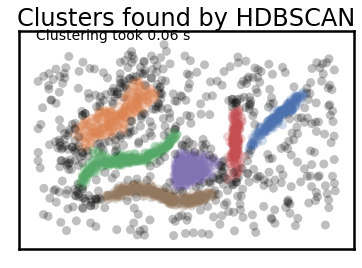

In [13]:
# HDBSCAN
import hdbscan

plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

# Data

What does the data look like?

In [14]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])